## Introduction

Every science and engineering discipline relies on differentiation in some capacity, whether seeking to optimize system operations, deriving rates of change, or evaluating complex expressions. In this era of abundant computationally intensive tasks, evaluating gradients of any function (regardless of form) is both practical and valuable. The FADiff package addresses this task by automatically differentiating functions in either forward or reverse mode. By implementing automatic differentiation (AD), which sequentially evaluates elementary functions, FADiff avoids the complexity of symbolic differentiation and the precision issues of numerical differentiation. Additional information on implementation is below.

## Background

Automatic Differentiation (AD) is a set of techniques for evaluating derivatives precisely based on computation graphs, chain rules and other symbolic rules. Compared with manual calculation or a symbolic approach to calculating derivatives, it is highly convenient and fast since it frees users from tedius calculations and proofs. Compared with finite approximation (a.k.a numerical differentiation), it is more accurate in that it avoids truncation errors or round-off errors that might arise in symbolic differentiation when selecting a huge step (h) or a tiny step (h). (We've analyzed this point in HW4.). Due to these advantages, it has been widely used in scientific computing, machine learning, deep learning, etc. 

The mathematical background knowledge mainly includes matrix-vector products, the Jacobian matrix, the algegra of dual numbers, Taylor series expansions, higher-order derivatives, etc. We will discuss them in more details later. There are 2 evaluation modes in AD, **forward mode** and **reverse mode**.

1. Forward mode performs the operation of evaluating the numerical derivative concurrently with evaluating the function itself on a computational graph.

2. Reverse mode is an alternative to the forward mode. It uses the computation graph in forward mode to calculate the final output and then traveres reversely to perform the operation of evaluating derivatives. This mode is commonly used in deep learning and neural networks, in which it is also called backpropogation. 




### 1. Matrix-vector Products
##### 1.1 Definition 
   Given an $m\times n$  matrix $A_{m\times n}$ and a vector $x\in R^{n}$, there is a way to create a linear combination
   
$$
x_1a_1 + x_2a_2 + ... + x_na_n \in R^m 
$$

using the columns $a_1, . . . , a_n$ of $A$, where $x=\left[x_1,x_2,...,x_n \right]^{T}$.

##### 1.2 Notes
1. Matrix-vector products are only valid when the sizes of the matrix and vector are compatible – the number of elements of vector $x$ must equal the number of columns of matrix $A$. The number of elements in the output vector must equal the number of rows in matrix $A$.
2. We can interpret matrix-vector products as creating a linear transformation or a **map** from $R^n$ to $R^m$

### 2. Two Evaluation Modes: Forward & Reverse, Jacobian Matrix.
Automatic Differentiation (AD) can be applied on both scalar functions with one variable or functions with multiple variables. The derivative calculation of a single variable is relatively straightforward, while in situations with multiple variables, we will introduce a terminology called the Jacobian Matrix ($J$).


Let's start from a general case with $x$ is a vector.

##### 2.1 Jacobian Matrix
If $f$ is a matrix of multiple functions with multiple input variables, then denote $f$ as 

$$
f=\begin{bmatrix} f_1(x,y) \\ f_2(x,y) \end{bmatrix}
$$

Then, the derivative of matrix $f$ is called the Jacobian Matrix $J$:

$$
\begin{aligned}
  J = 
  \begin{bmatrix}
    \partial f_{1} / \partial x & \partial f_{1} / \partial y \\
    \partial f_{2} / \partial x & \partial f_{2} / \partial y
  \end{bmatrix}
\end{aligned}
$$

##### 2.2 Forward Mode
A program can be written as a combination of several functions: $f = f_1 ... f_n$. Let's set $x_0$ as a vector in $R^n$ and $x_n$ as the output vector; then each $f_i$ is the transaction function (a generalized "matrix" from the definition of matrix-vector products), and 

$$
x_1 = f_1x_0
$$
$$
x_2 = f_2x_1
$$
$$
...
$$
$$
x_n=f_nx_{n-1}.
$$
From the chain rule, we have:

$$
\dot{x_1} =  (J f_1 x_0)
$$
$$
\dot{x_2} =  (J f_2 x_1) \times \dot{x_1}
$$
$$
 ... 
 $$
$$ 
\dot{x_n} = (J f_n x_{n-1})\times \dot{x_{n-1}}. 
$$

The above process of evaluating derivatives is called **forward mode Automatic Differentiation**.




##### 2.3 Reverse Mode
If we take the transpose of both the left and right sides of equation (1),(2)...(n) above, then 

$${x_1}^\prime = (f_1x_0)^T$$
$${x_2}^\prime = (f_2x_1)^T$$
$$...$$
$${x_n}^\prime = (f_nx_{n-1})^T.$$

From the chain rule, we have:

$$ {x_{n-1}}^\prime =  (J f_n x_{n-1})^T$$
$$ {x_{n-2}}^\prime =  (J f_{n-1} x_{n-2}) \times {x_{n-1}}^\prime $$
$$ ... $$
$$ {x_0}^\prime = (J f_1 x_0)\times {x_1}^\prime. $$

The above process of evaluating derivatives is called **reverse mode Automatic Differentiation**.




##### 2.4 Example of computational graph, forward and reverse mode.

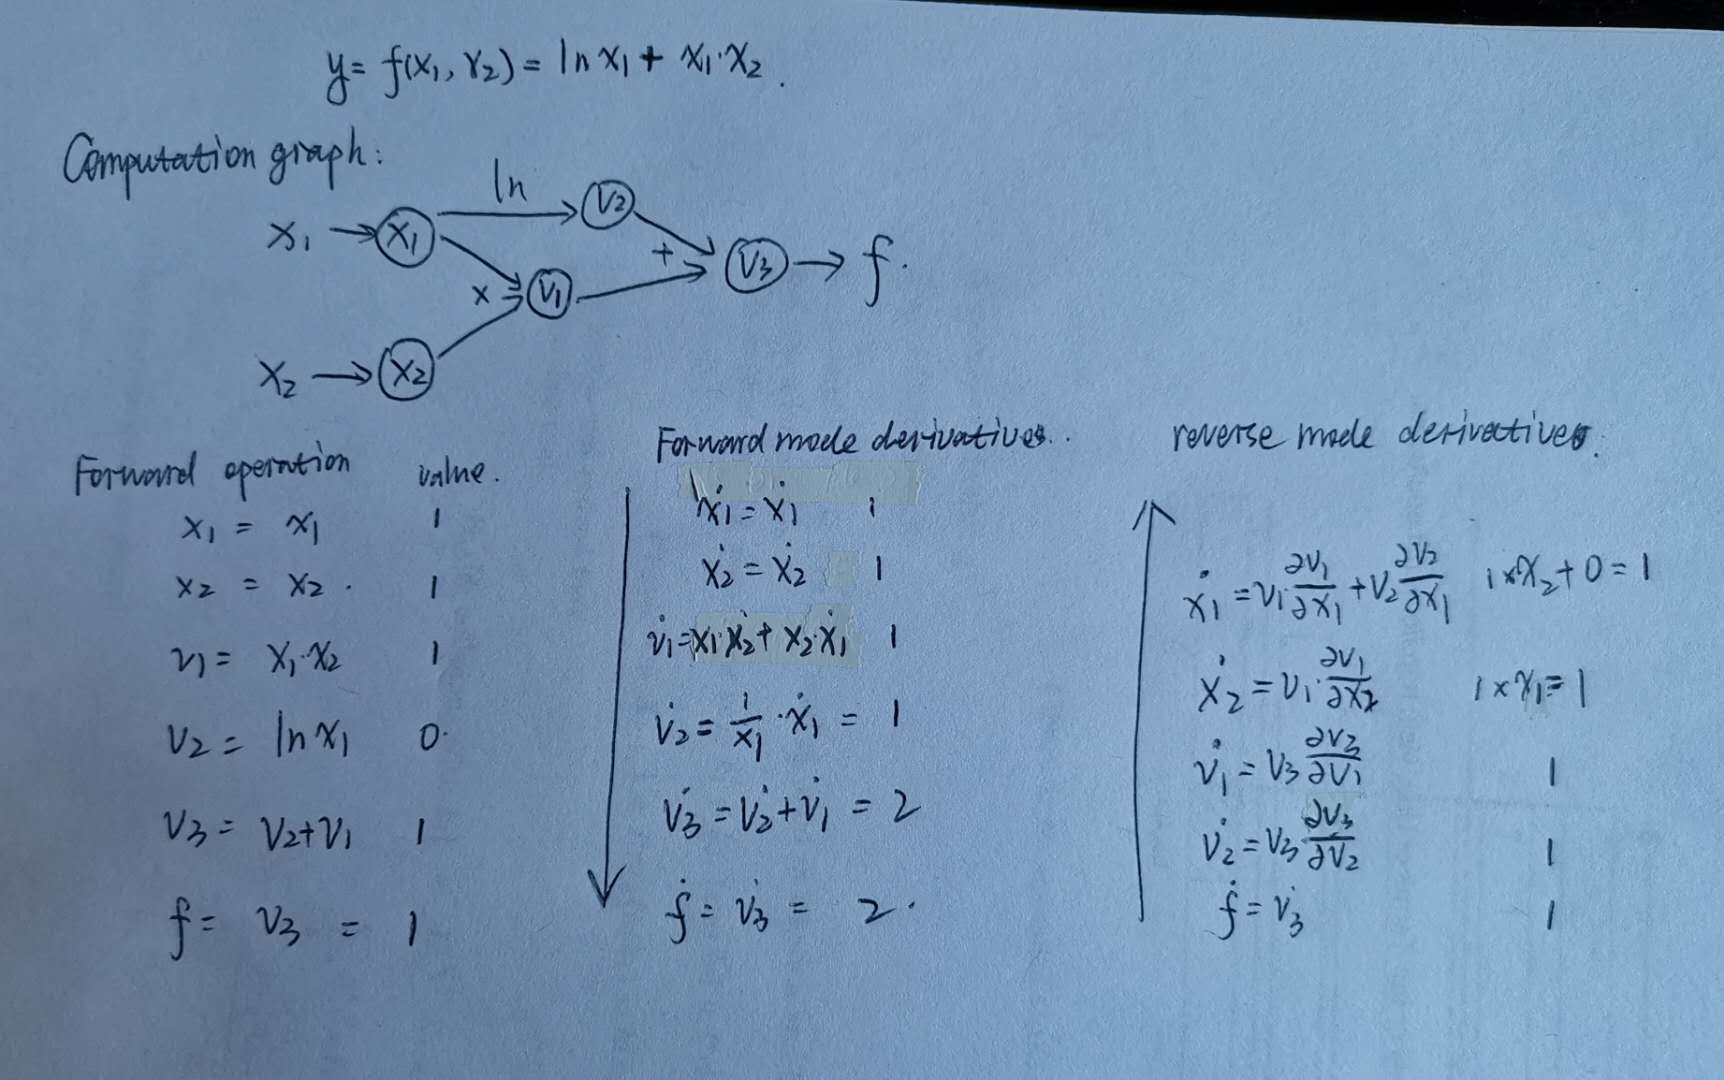

##### 2.5 When to use reverse or forward mode?

The difference between forward and reverse mode lies in the start point of matrix multiplication.

When the dimension of the input is less than that of the output, forward mode has fewer multiplication operations than reverse mode; comparably, when the dimension of the input is more than that of the output, reverse mode has fewer multiplication operations. 

Therefore, when the dimension of the input is less than that of the output, forward mode is more efficient; when the dimension of the input is more than that of the output, reverse mode is more efficient. 

### 3. The algebra of dual numbers
##### 3.1 Definition
A dual number (z) is composed of a real part (a) and a dual part (b).  We denote it as 

$$z = a + \epsilon b.$$

##### 3.3 What's the effect of dual numbers on derivatives? 
The usage of a dual number augments the arithmetic in real number space to any input and allows the user to get the derivatives without calculating them. A function f(x) where x is a dual number can be re-written in a dual number format, where the real component is the function and the dual component contains the derivative (as we discussed in lecture 10).

Generally, let $\hat f$ denote the expansion of real-value function $f$ to dual number space, then

$$ \hat f(x_1+x_1^\prime\epsilon, ..., x_n + x_n^\prime\epsilon):=f(x_1,...,x_n)+\dot f(x_1,...x_n) \left(\begin{array}{c}
    x_1^\prime\\ 
    .\\
    .\\
    .\\
    x_n^\prime\\
  \end{array}\right)\epsilon $$

If $f$ is a matrix of multiple differentiable functions, then we can extend the above framework by replacing $\dot f(x_1,...x_n)$ with $J f (x_1,...,x_n)$.


### 4. Elemental functions

Automatic Differentiation relies on the fact that we already know the derivative at each step. So, we need some elemental functions. A function is called "elemental" if it always returns the same result for the same argument values and has no side effect like modifying a global variable, etc. The result of calling an elemental function is the exact return value. 

Some examples are pow(), mean(), sqrt(), while printf(), rand() and time() are not elemental functions.


## How to use FADIFF


We expect the use of our package, `FADiff`, to be through its API located in the module `FADiff.py`. The API takes in Python ints, floats, and `FADiff` objects as parameters as well as lists of said objects. Each `FADiff` object has `val` and `der` methods with an @property decorator attached that allow the user to retrieve the outputs of an automatic differentiation calculation. These return values are NumPy arrays and can be indexed into. The elements in `der` are the partial derivatives of the object with respect to the input variables and `val` is the value for the object. For certain areas of our implementation, our package requires the exclusive use of internally defined objects and functions. For example, we prohibit users from using external libraries for elementary functions (e.g., sine and cosine) with our package’s variables and only allow them to use our package’s implementations for such functions. This reduces the potential for issues such as disuse or misuse of our package’s operator-overloaded functions, among other things. How the user should use our package’s API including the proper use of variables and methods will be further explained in the next sections.


### Run

Our package can be downloaded from PyPI by running the following in a terminal window:

```
pip install FADiff==0.19
```

We implemented our package with Python 3.8.2 on Linux but other versions of Python may still be compatible. In a user’s code file, two headers are needed to import and use our entire package. Shown below is an example demonstration of the use of our package in Python. The following code would be in a user’s code file:

```
from FADiff import FADiff as ad      # User must import   
from FADiff import Elems as ef       # User must import

ad.set_mode('forward')           # User MUST set mode of AD at TOP of their code
                                 #   ('forward' is the default mode) and nowhere
                                 #   else

# SCALARS
print('SCALARS\n=======\n')

x = ad.new_scal(2)                   # Creates FADiff Scal x with value of 2
y = ad.new_scal(5, name='y')         # 'name' parameter is optional
f = x * y + ef.sin(x)                # Creates function f using Scal variables       
                                     #   and FADiff's elemental sine operator
print(f'x.val --> {x.val}')          # Value of x
print(f'x.der --> {x.der}')          # Derivative of x 
print(f'f.val --> {f.val}')          # Value of f
print(f'f.der --> {f.der}')          # Jacobian of f
print(f'f.der[0] --> {f.der[0]}')    # Partial derivative of f wrt x
print(f'f.der[1] --> {f.der[1]}')    # Partial derivative of f wrt y

z = ad.new_scal(3)                   # Adding more variables
g = x * y + ef.sin(x) + z
print(f'\ng.val --> {g.val}')                    
print(f'g.der --> {g.der}')                     

# VECTORS
print('\nVECTORS\n=======\n')

x1 = ad.new_vect([2, 3, 4])      # Creates FADiff Vect x1 with value [2, 3, 4]
x2 = ad.new_vect([3, 2, 1])
f = x1 - x2
print(f'x1.val --> {x1.val}')
print(f'x1.der --> {x1.der}')
print(f'f.val --> {f.val}')
print(f'f.der -->\n{f.der}')
print(f'f.der[0] --> {f.der[0]}')
print(f'f.der[1] --> {f.der[1]}')

# FUNCTION VECTOR w. SCALARS
print('\nFUNCTION VECTOR w. SCALARS\n==========================\n')

x = ad.new_scal(3)
y = ad.new_scal(2)
f1 = x * y + x
f2 = 8 * y
f = ad.new_funcvect([f1, f2])    # Creates FADiff FuncVect f with Scal f1 and f2
print(f'f.val --> {f.val}')
print(f'f.der -->\n{f.der}')

# FUNCTION VECTOR w. VECTORS
print('\nFUNCTION VECTOR w. VECTORS\n==========================\n')

x1 = ad.new_vect([2, 3, 4])
x2 = ad.new_vect([1, 3, 2])
f1 = x1 * x2
f2 = x1 * 8
f = ad.new_funcvect([f1, f2])    # Creates FADiff FuncVect f with Vect f1 and f2
print(f'f.val -->\n{f.val}')
print(f'f.der -->\n{f.der}')
```

To run the above code, in a terminal window, navigate to the folder that contains the code file and run the following:

For Python 2 --
```
python code_file_name.py
```
For Python 3 --
```
python3 code_file_name.py
```

where 'code_file_name' is the name of the user’s code file. The following output should then be rendered:

```
SCALARS
=======

x.val --> 2
x.der --> 1
f.val --> 10.909297426825681
f.der --> [4.58385316 2.        ]
f.der[0] --> 4.583853163452858
f.der[1] --> 2.0

g.val --> 13.909297426825681
g.der --> [4.58385316 2.         1.        ]

VECTORS
=======

x1.val --> [2 3 4]
x1.der --> [1. 1. 1.]
f.val --> [-1  1  3]
f.der -->
[[ 1.  1.  1.]
 [-1. -1. -1.]]
f.der[0] --> [1. 1. 1.]
f.der[1] --> [-1. -1. -1.]

FUNCTION VECTOR w. SCALARS
==========================

f.val --> [ 9 16]
f.der -->
[[3 3]
 [0 8]]

FUNCTION VECTOR w. VECTORS
==========================

f.val -->
[[ 2  9  8]
 [16 24 32]]
f.der -->
[[[1. 3. 2.]
  [2. 3. 4.]]

 [[8. 8. 8.]
  [0. 0. 0.]]]
```

Note that the order of the partial derivatives in the Jacobian arrays are in the
same order as the order in which the user defined their corresponding FADiff objects
in the user’s code file.


### Test
To run our test code, in a terminal window clone our respository by running the following:

```
git clone https://github.com/teamxvii/cs107-FinalProject.git
```

Navigate to the `cs107-FinalProject/FADiff` folder (where `test_main.py` is located) and run the following in the terminal:

```
pytest
```


## Software Organization

### 1. What will the directory structure look like?
Our directory structure looks like the following:
```
cs107-FinalProject/
    FADiff/
        FADiff.py
        Elems.py
        FuncVect.py
        test_main.py
        fad/
            Gradients.py
            Matrices.py
        rev/
            Gradients.py
            Matrices.py
    docs/
        milestone1.ipynb
        milestone2.ipynb
        milestone2_progress.ipynb
        documentation.ipynb
    requirements.txt
    LICENSE.txt
    README.md
```
    
### 2. What modules do you plan on including? What is their basic functionality?
Our FADiff package contains a module named `FADiff.py`. `FADiff.py` contains our main automatic differentiation class `FADiff()` that acts as our API. `Elems.py` contains elementary functions that are used to calculate the derivatives of
all the elementary functions our package supports such as sine and cosine. `FuncVect.py` contains the class that represents vector functions. There are also a `Gradients.py` and a `Matrices.py` for both forward mode and reverse mode of our AD implementation located in the `fad` and `rev` folders respectively. Our package
also contains a module named `test_main.py` which contains our test class used in our
testing. We also used NumPy as an external dependency for our calculations. As explained in the
“How to Use FADiff” section earlier in this document, our implementation
limits the use of external packages or only uses them internally
(i.e., hidden from the API).

### 3. Where will your test suite live? Will you use TravisCI? CodeCov?
Our tests are in the `cs107-FinalProject/FADiff` folder in `test_main.py`.
We used TravisCI and CodeCov as well as pytest for testing. Please see the How to Use FADiff section earlier in this document for running tests.

### 4. How will you distribute your package (e.g. PyPI)?
We distributed our package through PyPI. 

### 5. How will you package your software? Will you use a framework? If so, which one and why? If not, why not?
We did not package the software using any sort of framework. The code is clonable and installable via GitHub and via PyPI respectively.

### 6. Other considerations?
Our software organization did not deviate much from the original plan. We accomplished what we set out to do and more.

## Implementation

### 1. Classes
Our code relies on 6 main classes:
* FADiff: API for package
* funcVect: Vector function class for forward and reverse mode
* fad/Scal: Scalar variable class for forward mode
* fad/Vect: Vector variable class for forward mode
* rev/Scal: Scalar variable class for reverse mode
* rev/Vect: Vector variable class for reverse mode

### 2. Class Attributes and Methods
Attributes and methods for each class are described below:
* FADiff: 
  - Contains global lists of all instances of forward mode scalar variables (fad/Scal), forward mode vector variables (fad/Vect), reverse mode scalar variables (rev/Scal), and reverse mode vector variables (rev/Vect)
  - Contains methods for setting forward/reverse mode, creating a new scalar or vector object, and creating a new vector function
* Scal (forward mode):
  - Contains attributes for the value of a scalar variable, partial derivative of the variable, and parents of the variable, where "parents" are the original inputs (not intermediate values)
  - Contains dunder methods for basic operations (addition, subtraction, multiplication, etc.), comparison operators (equals/not equals), and standard getters and setters
* Vect (forward mode):
  - Contains attributes for the value of a vector variable, partial derivative of the variable, and parents of the variable, where "parents" are the original inputs (not intermediate values)
  - Contains dunder methods for basic operations (addition, subtraction, multiplication, etc.), comparison operators (equals/not equals), and standard getters and setters
* Scal (reverse mode):
  - Contains attributes for the value of a scalar variable and the partial derivative of the variable
  - Contains dunder methods for basic operations (addition, subtraction, multiplication, etc.), comparison operators (equals/not equals), and standard getters and setters, all with a slightly different implementations than for forward mode to accomodate backpropogation mechanics
* Vect (reverse mode):
  - Contains attributes for the value of a scalar variable and the partial derivative of the variable
  - Contains dunder methods for basic operations (addition, subtraction, multiplication, etc.), comparison operators (equals/not equals), and standard getters and setters, all with a slightly different implementations than for forward mode to accomodate backpropogation mechanics

### 3. Data Structures
Values for scalar variables are stored as floats or ints. Values for vector variables are stored in NumPy arrays. The partial derivative of a forward mode scalar variable is stored as a dictionary where the keys are all instances of the Scal (for scalar) class and the values are the partial derivative of the particular variable with respect to each key. The same dictionary structure is used for the partial derivative of forward mode vector variables, but the keys are all instances of the Vect (for vector) class and the values are partial derivatives in the form of a NumPy array. For reverse mode, scalar and vector variables, a dictionary is also used to store partial derivatives, but the values are lists of tuples containing the parent variable and the partial derivatives of the parent with respect to the key (an instance of the Scal/Vect class for reverse mode). Vector functions are stored as lists. Lastly, all instances of Scal or Vect objects are stored in lists of the AutoDiff class. 

### 4. Custom Elementary Functions
The `Elems.py` module contains custom functions for basic elementary operations using the classes described above.

<font color='red'>
    
### 5. External Dependencies (? - Sphinx still true?)
We rely on NumPy for array storage and mathematical operations on scalar and vector variables (trigonmetric functions, exponentiation, etc). We will eventually use its array and linear algebra functions as well. We are considering also using Sphinx for auto-rendering and organizing our documentation.

</font>

## Final Extension

### 1. Reflection of Milestone 2
##### Future Features in Milestone 2

Things to impelement next

In this Milestone, we treat Jacobian as a scalar and it can only handle the case of single function of single input. Moving forward, we want to generalize the package for broader use cases.

1. We will make the forward mode automatic differentiation object be able to access Jacobian Matrix.
2. We will make the object to be for calculating partial direvatives.The challenging part is how to handle the number of variables we have, e.g if we define a class to calculate derivatives for multivariable functions f(x,y,z) and f(x,y,z,m,n), which data structure should we use as the attribute of the class?
If we use an array instead of a scalar as the attribute, how can we implement the differentiation in an array?
3. We might also think about how to calculate differentiation for polynomial functions like f(x) = x + sin(x) + cos(x).
The challenging part here is how to implement a dunder method to handle the order of add or substraction
Presumably, we might need to change the classes or change the data structures or add new modules. We should consult TAs and Prof. Sondak for more instruction and insights on implementation.

##### Feedback from Milestone 2 [3pts] (D Sondak) 1 pt

The future feature should be presented in a clearer manner including concrete steps on how you will realize the implementation of this extension. You are already required to implement the full version of forward mode (multiple functions and multiple inputs) for this project. The example provided (f(x) = x + sin(x) + cos(x)) should already work with the current implementation.

Please set up a meeting with Tosin to discuss potential extensions as soon as possible.

##### Reflection
In Milestone2, we misunderstood the requirement for future feature as what we would do towards the minimum requirement on Forward Mode for the final deliverable. Then we communicated with TA and instructor and clarified the expectations and the right direction. 
Our extension are implementing the reverse mode and allowing users the flexibility of chosing and switching between forward and reverse mode. 

### 2. Description of extension feature
1. We implemented reverse mode which realizes the same functionality as forward mode in a separate module.
2. We also created a efficient and easy-to-use setting to allow users switching between modes: The default setting is forward mode, 
but if one wants to use reverse mode, he can just put "ad.set_mode('reverse')" at the top of the code file to call our API functions of reverse mode. 
If he wants to switch back to forward mode, just replace the "reverse" with "forward" in "ad.set_mode()".


### 3.Background of extension -- reverse mode

In reverse mode, the algorith first go through the forward evaluation trace to get the values of the outcome the intermediate nodes, and then reverse back to get the gradients. In calculating the gradients, it starts with the final outcome, setting its derivative with respect to itself to 1, and then reversely computes the precursive variable's derivative with respect to its inputs until it reaches the rood variable.
<br>
<br> In mathemetical form: 
- If $z_1,,,z_m$ are scalar inputs:
$$z_1 = f_1(z_0)$$
$$z_2 = f_2(z_1)$$
$$...$$
$$f = z_m = f_m(z_{m-1})$$
Then the derivative of $f$ with respect to $z_0$ :
\begin{equation}
\begin{split}
\frac{dz_m}{dz_0}& = \frac{dz_m}{dz_{m-1}}\frac{dz_{m-1}}{dz_{0}}\\
& = \frac{dz_m}{dz_{m-1}} \frac{dz_{m-1}}{dz_{m-2}}\frac{dz_{m-2}}{dz_0}\\
&...\\
&=\frac{dz_m}{dz_{m-1}} \frac{dz_{m-1}}{dz_{m-2}}...\frac{dz_{1}}{dz_0}
\end{split}
\end{equation}

- If the input or intermediate variable is a vector:
\begin{equation}
\begin{split}
u_1 & = f(v)\\
u_2 & = g(v)\\
t & = h(u_1,u_2)\\
\frac{d_t}{d_v} & = \sum_{i}\frac{dt}{du_i} \frac{du_i}{dv}
\end{split}
\end{equation}


## Broader Impact and Inclusivity Statement 
### Broader Impact
Regarding the broader impact portion, try to think about the ways people will use or misuse your software. What are the consequences? How should people use it responsibly? Are there any ethical implications? The NeurIPS website has a number of references to get you started on thinking about this:

1. On a positive side, our software gives users a flexible, convenient problem-solving tool in automatically calculating derivatives in multiple settings without coding each steps on their own or taking care of every step on a white board and iterate, especially in large-scale computation and complex networks.
Considering a 20 layers neural network with 100 nodes on each layer, hand-coding the derivatives and back propogation is time-consuming and may cause bugs and errors in each steps easily. 
However, by using this package, the users just define their activation function, loss function, and the software will do all the operation automatically in a few seconds with respect to every parameter.
Moreover, our work also makes it straight-forward to implement gradient-based learning algorithm like gradient descent optimization, etc, which would arouse oceans of implication in both scientific research and real-word application.

2. However, there can also be some situations when people misuse our software. First, it only supports the minimum requirement and can't support the case: "vector input with vector functoins" at least at current stage. Second, it can only give us the first derivative. 
Due to these limitation, we have to call this out in the user manual in case the users implement our software in unsuitable cases or causing errors.

3. We are algo taking the risk of passivating human intelligence of young students. Considerting a young students who are studying calculus and derivatives or maching learning theories. Presumably that it is good for them to learn every details using hands-on experience. However, what if he uses our software in exams, assignments or interviews for accurate answers without digging down to the every details and calculation.
Although using software is fast and efficiency in a high priority in many cases, it is harmful for a beginner to take the short cut. This software would likely encourage them to cheat and omit the "repetitive" but helpful programming practice.

4. Another ethical consideration is that we might taking the risk of causing negative downstream effects. We have no knowledge of what the exact purpose of using our software, whether it is legal or peril. If it is for illegal usage, creating product that might cause harmful downstream effect to the society, our software will be involved in this
ethical concerns which is not what we are expecting. 

### Inclusivity Statement
It has been a hot issue that computer science and software development  should encourage diversity and be more inclusive to minority groups, for example, women, under-represented groups, people with disability, etc.
Our software should also serve as a practice to pomote diversity, equity and inclusion and enable a equal contribution to our code base for all groups and individuals. 

1. The first thing we would advocate is to make our software a open source to everyone, enabling them to create pull request and add any comment to the development and also make this conversation public. 

2. Second, we would also ask users not to include their identity like gender/race/education level/institutions when they post, raise errors or create pull request on the repo. In this way, 
we can encourage more contribution from minority groups (under-represented students) without biasing people behavior by letting them know that only "professional masters" can contribute.
If possible, we hope to add multi-language translated user manual for users from different parts of the world in order to empowering a diversed participation.

3. Finally, we would also provide guidance and resources to engage economically disadvantaged students and people with disabilities.
And always put a statement on our manual or software page phrasing the diversity and inclusivity statement and we actively encourage contribution from people from any
age, culture, ethnicity, gender, geographic location, race and economic background.

## Future Work

### What we want to add
Our package only calculates the first-order derivative, in the future, we want to add higher-order derivatives. 

### Why
Firs-order derivative can only tell us the direction of movement. But the higher order derivatives can enable more use cases, for example, the second derivative can tell the rate of increase or decrease; the third order derivative can be useful in analyzing the jerk or jolt over time, an important quantity in engineering and motion control. From a statistical prospective, higher-order derivatives enables Riemannian Hamiltonian Monte Carlo sampler to overcome severe geometrical pathologies that first-order sampling cannot by using the second and third order derivatives of the log posterior
distribution.

### How to implement
Let's take second-order derivative as an example, we could add a feature to allow our current package to return the simbolic function of the first-order derivative, based on which, we can apply the first-order automatic differentiation twice: Applying the forward mode twice to get a Hessian matrix ($H = f^{''}$) (or Hessian vector product) or we calculate truncated Taylor series in a particular direction to get a higher-order derivative of scalar inputs. 